<a href="https://colab.research.google.com/github/Dinamo597/IA_2025/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic-train.csv')

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.isnull.sum()

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
total

In [ ]:
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
def bar_chart(feature):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    test = pd.DataFrame([survived, dead])
    test.index = ['Survived', 'Dead']
    test.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.xlabel(feature)
    plt.ylabel('Number of passengers')
    plt.title('Survival count in relation to ' + feature)
    plt.show()

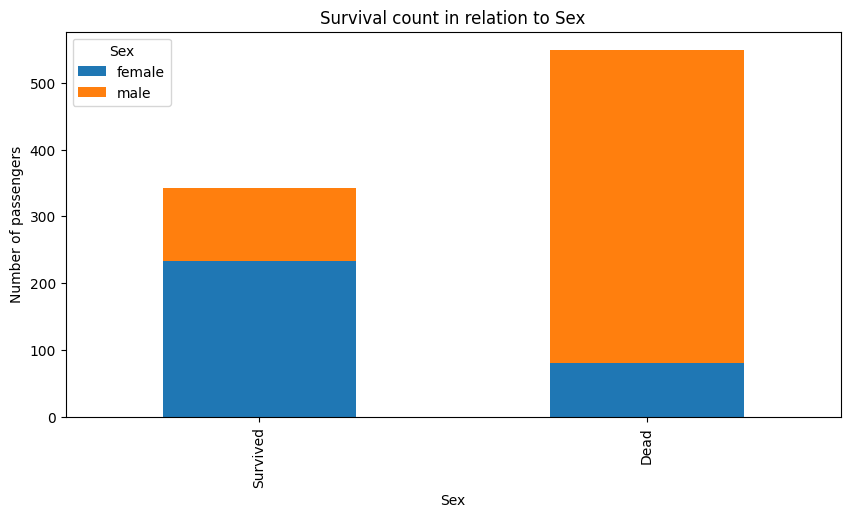

In [ ]:
bar_chart('Sex')

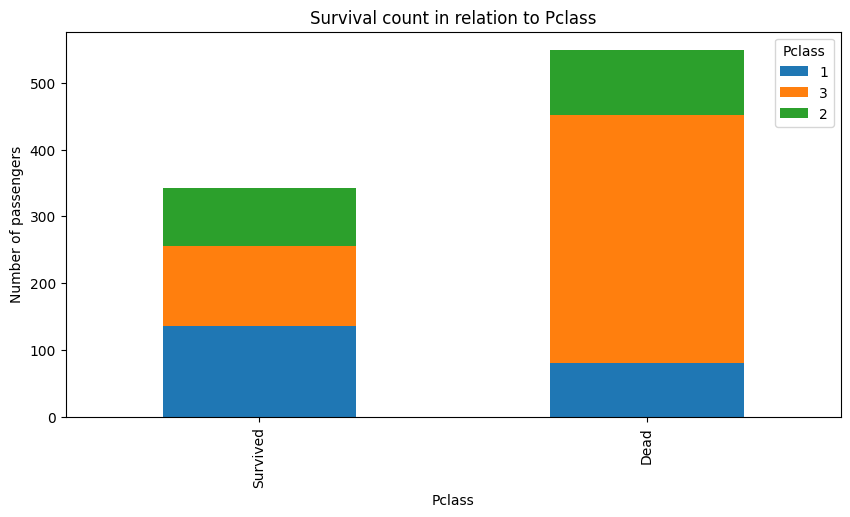

In [ ]:
bar_chart('Pclass')

La gráfica señala que la clase alta tuvo mayor probabilidad de supervivencia con respecto a otras clases. La gráfica señala que la clase 3 fallecío más en compración con otras clases

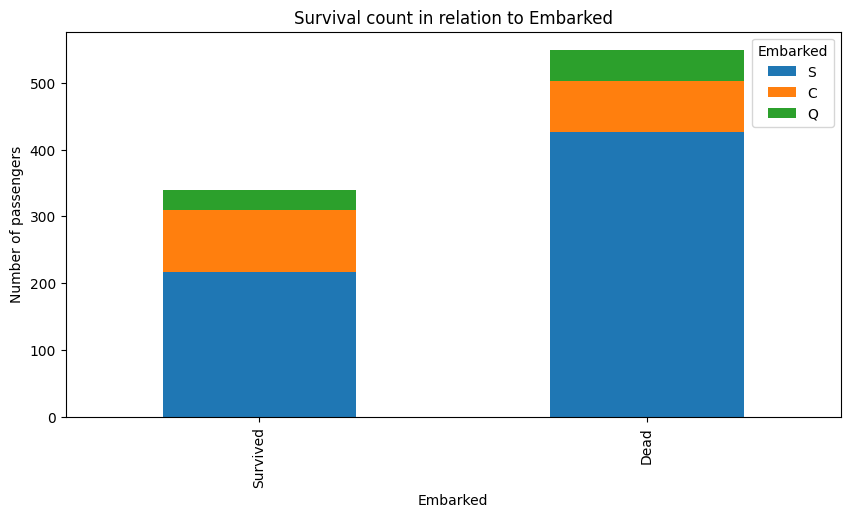

In [ ]:
bar_chart('Embarked')

La gráfica confirma que
*Una persona que **aborda desde C** tuvo una ligera probabilidad de sobrevivir
*si una persona que aborda **Q O S** probablemente **murío**

##Ingeniería de características
Es el proceso de usar el dominio del conocimiento para crear nuevas características (feature vector) y que logre que los algoritmos de machine learning funcionen correctamente.
Feature vector es un vector n-dimensional que representa un objeto. Muchos algoritmos de ML requieren una representación númerica de los objetos, ya que facilitan el procesamiento y el ánalisis estadístico.

In [ ]:
## Crear un mapa de titulo
 Se tomaran los valores mas representativos
1 Mr: 0
2. Miss: 1
3. Mrs 2
4. Otros: 3

In [12]:
def replace_titles(data):
    data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    title_mapping={"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3,"Countess":3,"Ms":3,"Lady":3,"Capt":3,"Mme":3,"Don":3,"Jonkheer":3}
    data["Title"]=data["Title"].map(title_mapping)
    data["Title"]=data["Title"].fillna(3)
    return data

In [15]:
df=replace_titles(df)
df.sample(10)

NameError: name 'df' is not defined